In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('dataset_7_features.csv')
data=np.array(data)

In [4]:
#features
X=data[:,3:]
#binary label
y=data[:,1]
y=y.astype('int')

In [5]:
X.shape

(1018002, 7)

In [6]:
y.shape

(1018002,)

In [7]:
#Dimensionality reduction
#1.PCA
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)


PCA()

In [8]:
#pca attriibutes
print(pca.explained_variance_ratio_)


[8.05401834e-01 1.45247791e-01 3.94993120e-02 5.33157275e-03
 4.29828778e-03 1.44521796e-04 7.66814131e-05]


In [9]:
#reducing to 3 features which explains more than 90% variance
pca=PCA(n_components=3)
reduced_X=pca.fit_transform(X,y)
reduced_X.shape

(1018002, 3)

In [ ]:
#2.LDA

In [7]:
#train,test,split
#test_size
#valid_size
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size=0.1)

In [8]:
#Classification
#1.Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
tree_clf=DecisionTreeClassifier(max_depth=12)
tree_clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=12)

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10)) 
plot_tree(tree_clf, ax=ax)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000019F82B7DAF8> (for post_execute):


KeyboardInterrupt: 

In [10]:
# The predictions are stored in X_pred
X_pred = tree_clf.predict(X_test)
cnt=0
for i in range(len(X_pred)):
    if X_pred[i]==Y_test[i]:
        cnt=cnt+1

print("Accuracy",cnt/len(X_pred))

Accuracy 0.7951876464260981


In [11]:
tree_clf.get_depth(),tree_clf.get_n_leaves()

(12, 2177)

In [77]:
#2.Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=20, 
                               bootstrap = True,
                               max_features = 'sqrt',max_depth=12)
# Fit on training data
model.fit(X_train,Y_train)

preds=model.predict(X_test)

cnt=0
for i in range(len(preds)):
    if Y_test[i]==preds[i]:
        cnt=cnt+1
print("Accuracy",cnt/len(preds))


Accuracy 0.7951581770227062


In [13]:
#3.Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb_clf = GradientBoostingClassifier(n_estimators=120, learning_rate=1.0,
         max_depth=1, random_state=0).fit(X_train, Y_train)

preds=gb_clf.predict(X_test)

cnt=0
for i in range(len(preds)):
    if Y_test[i]==preds[i]:
        cnt=cnt+1
print("Accuracy",cnt/len(preds))
print(classification_report(Y_test,preds))

Accuracy 0.7810767137685964
              precision    recall  f1-score   support

           0       0.83      0.71      0.76    101710
           1       0.75      0.85      0.80    101891

    accuracy                           0.78    203601
   macro avg       0.79      0.78      0.78    203601
weighted avg       0.79      0.78      0.78    203601



In [ ]:
from sklearn.model_selection import GridSearchCV

model=GradientBoostingClassifier()
params={'n_estimators':range(1,200)}
grid=GridSearchCV(estimator=model,cv=2,param_grid=params,scoring='neg_log_loss')
grid.fit(X_train,Y_train)
print("The best estimator returned by GridSearch CV is:",grid.best_estimator_)

In [84]:
#4.Naive Bayes
from sklearn.naive_bayes import GaussianNB
bayes_clf=GaussianNB()
bayes_clf.fit(X_train,Y_train)
preds=bayes_clf.predict(X_test)

cnt=0
for i in range(len(preds)):
    if Y_test[i]==preds[i]:
        cnt=cnt+1
print("Accuracy",cnt/len(preds))
print(classification_report(Y_test,preds))

bayes_clf.classes_

Accuracy 0.7390926370695625
              precision    recall  f1-score   support

           0       0.82      0.62      0.70    101714
           1       0.69      0.86      0.77    101887

    accuracy                           0.74    203601
   macro avg       0.75      0.74      0.74    203601
weighted avg       0.75      0.74      0.74    203601



array([0, 1])

In [86]:
#5.Logistic regression
from sklearn.linear_model import LogisticRegression
lg_clf=LogisticRegression(random_state=0).fit(X_train, Y_train)
preds=lg_clf.predict(X_test)

cnt=0
for i in range(len(preds)):
    if Y_test[i]==preds[i]:
        cnt=cnt+1
print("Accuracy",cnt/len(preds))
print(classification_report(Y_test,preds))


Accuracy 0.7581396947952121
              precision    recall  f1-score   support

           0       0.80      0.69      0.74    101714
           1       0.73      0.83      0.77    101887

    accuracy                           0.76    203601
   macro avg       0.76      0.76      0.76    203601
weighted avg       0.76      0.76      0.76    203601



In [96]:
def plot_decision_surface(X,y,n_classes=2):
    X=X[:,:2]
    plot_colors = "ryb"
    plot_step = 0.02
    # Plot the decision boundary
    #plt.subplot(2, 3, 1)
    
    clf = DecisionTreeClassifier().fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    #plt.xlabel(iris.feature_names[pair[0]])
    #plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

    plt.suptitle("Decision surface of decision trees trained on pairs of features")
    plt.legend(loc="lower right", borderpad=0, handletextpad=0)
    _ = plt.axis("tight")

No handles with labels found to put in legend.


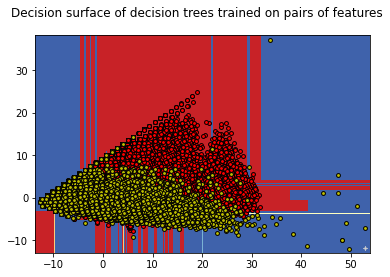

In [98]:
plot_decision_surface(reduced_X,y)